In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale as std_scale, robust_scale

from scipy.signal import find_peaks, find_peaks_cwt, peak_widths

import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import smooth, despike, utils

# import xarray as xr

import ipywidgets

# %matplotlib widget

In [6]:
# d = io.load_spectras(f"/home/intellimath/repos/spectras", {"штамм_бактерий": "96"})
d = io.load_spectras(f"/home/intellimath/repos/spectras", 
                     {"отсечки_по_молекулярной_массе": "more30", "начальная_концентрация_клеток_в_пробе": "3"})

for i, key in enumerate(d):
    entry1 = d[key]
    entry1.crop(42)
    entry1.allign_bottom()

for i, key in enumerate(d):
    entry2 = d[key]
    d[key] = entry2.robust_averaging(tau=3.0)

for i, key in enumerate(d):
    entry3 = d[key]
    entry3.remove_outlier_spectras(tau=3.0)
    entry3.allign_bottom()
    entry3.smooth(methos="irsa", tau=10.0)
    entry3.allign_bottom()
    # # entry3.subtract_baseline("mor", max_half_window=5, min_half_window=1)
    # entry3.subtract_baseline("aspls", pad=10, lam=1e6)
    # entry3.normalize_area_under_curve()
    # # # entry3.remove_outlier_spectras(tau=3.5)

# np.pad(
# pybaselines.utils.pad_edges()

3_5_SA_92_S_3_1_more30_1_0
3_5_SA_95_R_3_1_more30_1_0
3_5_SA_93_S_3_1_more30_1_0
3_5_SA_96_R_3_1_more30_1_0


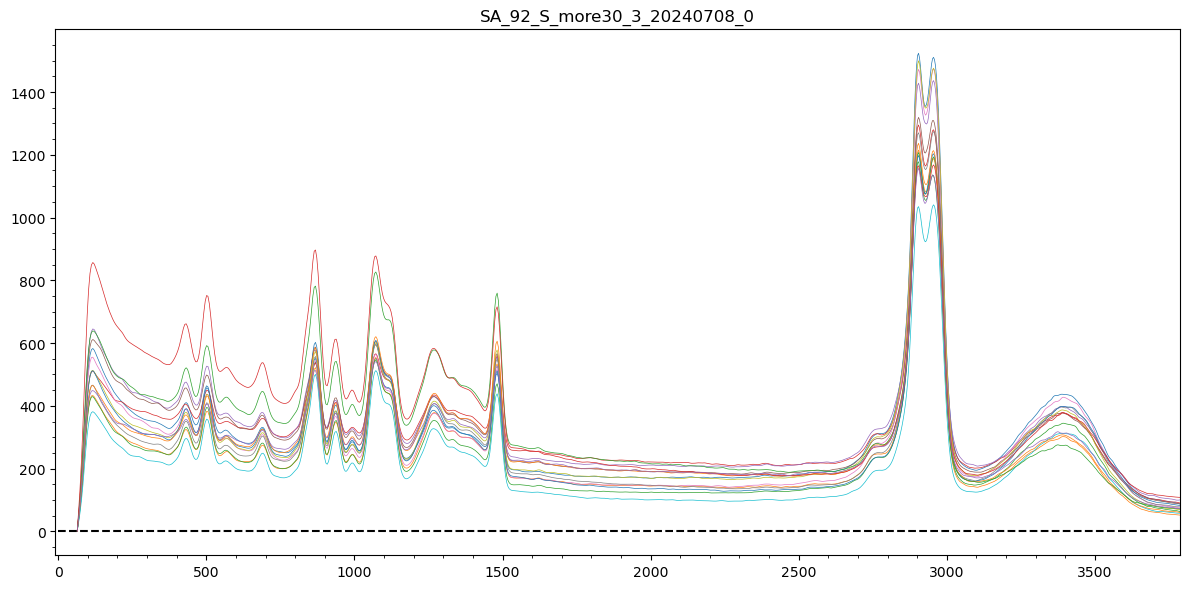

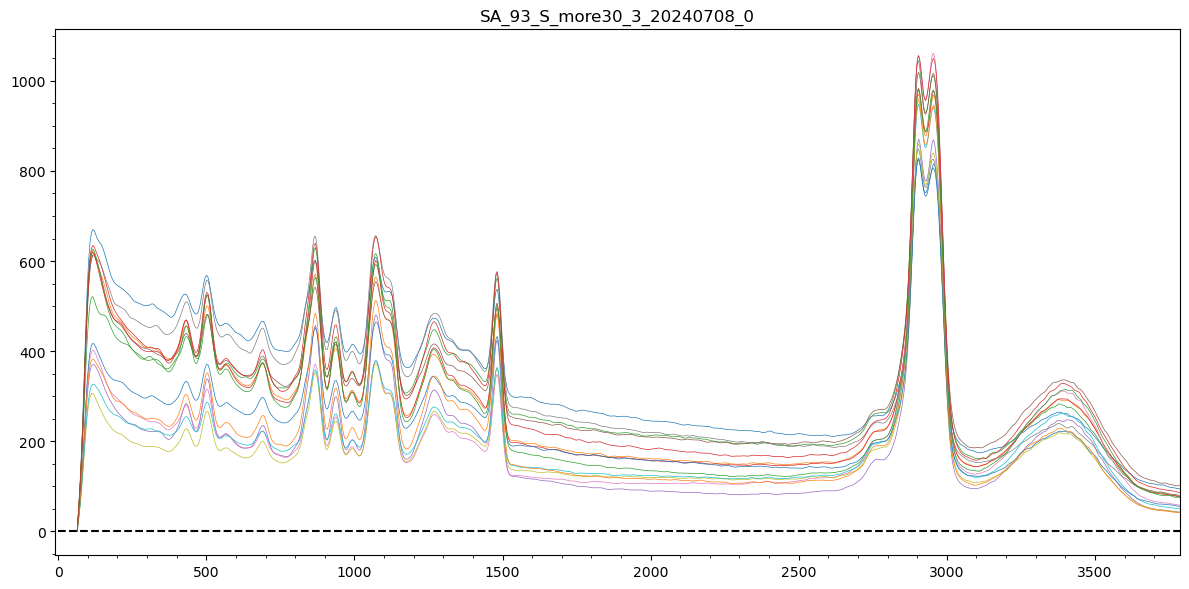

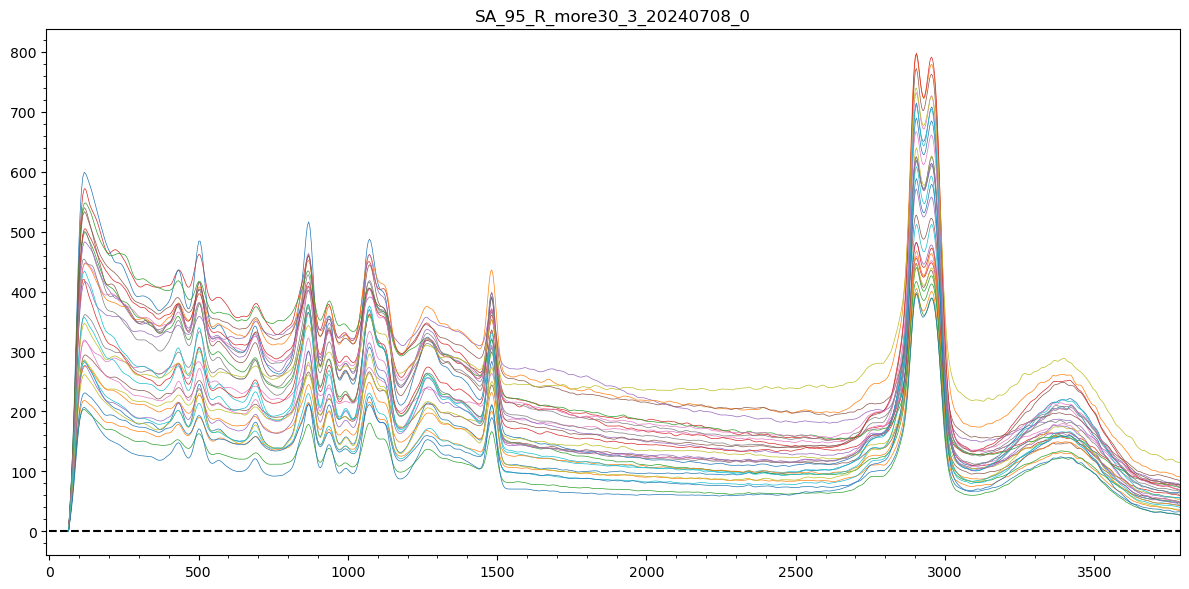

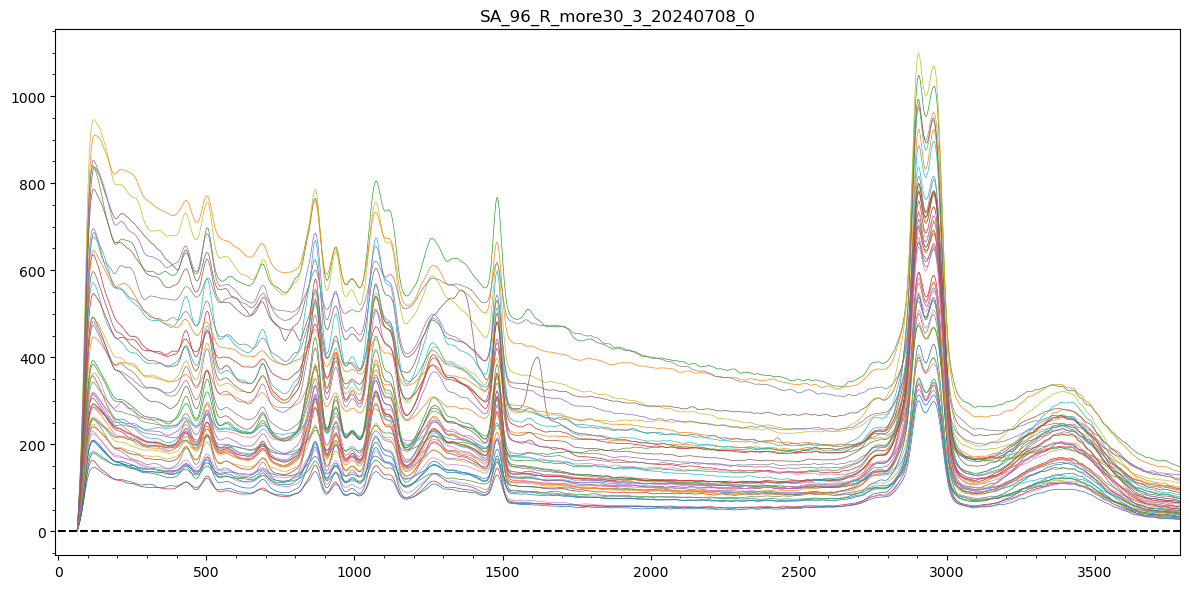

In [7]:
for i, key in enumerate(d):
    entry = d[key]
    Xs, Ys = entry.x, entry.y

    plt.figure(figsize=(12,6))
    plt.title(key)
    for xs, ys in zip(Xs, Ys):
        plt.plot(xs, ys, linewidth=0.5)
    plt.hlines(0, 0, max(xs), colors='k', linestyles='--')
    plt.xlim(-10, max(xs))
        
    plt.minorticks_on()
    plt.tight_layout()
    # plt.legend()
    plt.show()

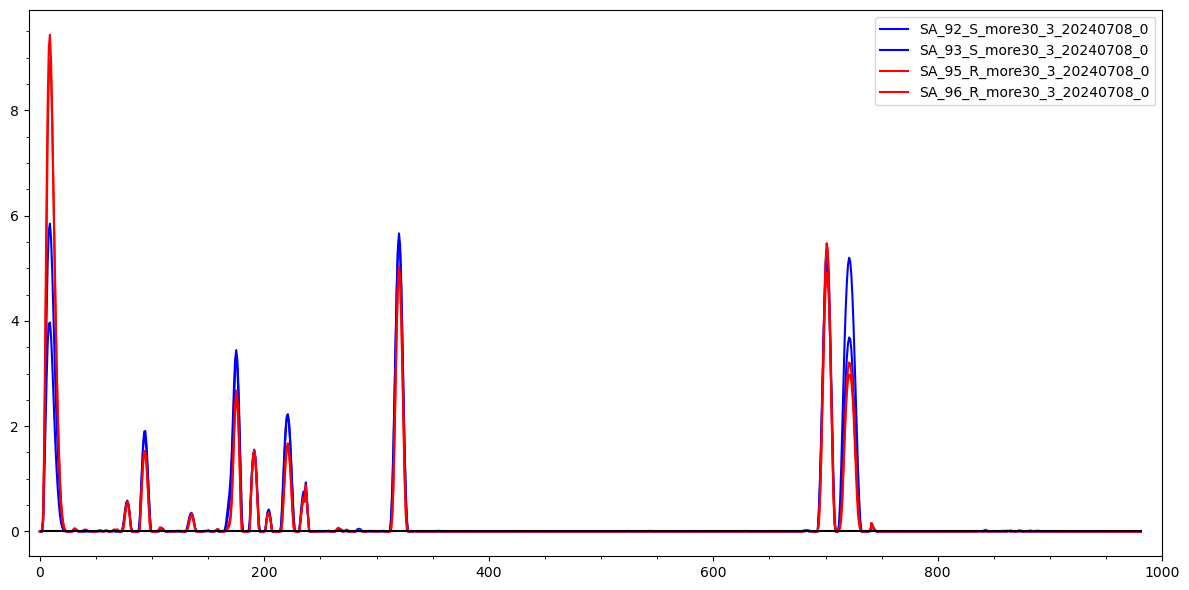

In [29]:
plt.figure(figsize=(12,6))
for i, key in enumerate(d):
    entry = d[key]
    Xs, Ys = entry.x, entry.y

    if "_R_" in key:
        color='r'
    elif "_S_" in key:
        color='b'

    plt.plot(np.mean(Ys, axis=0), linewidth=1.5, color=color, label=key)
    
plt.hlines(0, 0, len(Ys[0]), colors='k')
plt.xlim(-10,1000)
        
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.show()